# DataCamp Certification Case Study

### Project Brief

You have been hired as a data scientist at a used car dealership in the UK. The sales team have been having problems with pricing used cars that arrive at the dealership and would like your help. Before they take any company wide action they would like you to work with the Toyota specialist to test your idea. They have already collected some data from other retailers on the price that a range of Toyota cars were listed at. It is known that cars that are more than £1500 above the estimated price will not sell. The sales team wants to know whether you can make predictions within this range.

The presentation of your findings should be targeted at the Head of Sales, who has no technical data science background.

The data you will use for this analysis can be accessed here: `"data/toyota.csv"`

## Project Motivation - Toyota Cars Pricing

The prices of new cars in the industry is fixed by the manufacturer with some additional costs incurred by the Government in the form of taxes. So, customers buying a new car can be assured of the money they invest to be worthy. But due to the increased price of new cars and the incapability of customers to buy new cars due to the lack of funds, used cars sales prices of new cars in the industry is fixed by the manufacturer with some additional costs incurred by the Government are on a global increase. There is a need for a used car price prediction system to effectively determine the worthiness of the car using a variety of features. Even though there are websites that offers this service, their prediction method may not be the best. Besides, different models and systems may contribute on predicting power for a used car’s actual market value. It is important to know their actual market value while both buying and selling.

### The Dataset

**The Dataset used in this Project is data collected from retailers containing the price of different Toyota models and specifications**

#### Description
                     The data set has the following columns:
| Column Name| Details
| -- | - |
|modelCharacter|           the model of the car, 18 possible values
| year|                      Numeric, year of manufacture from 1998 to 2020
|price|                    Numeric, listed value of the car in GBP
|transmission|            Character, one of "Manual", "Automatic", "Semi-Auto"or "Other"
| mileage |                  Numeric, listed milage of the car at time of sale
|fuelType|                 Character one of "Petrol", "Hybrid", "Diesel" or"Other"
|tax|                      Numeric, road tax in GBP. Calculated based on CO2emissions or a fixed price depending on                                the age of the car.
|mpg| Numeric, miles per gallon as reported by manufacturer
|engineSize| Numeric, listed engine size, one of 16 possible values

#### GOAL
**To Predict the Price of Toyota Cars within an error range of £1500 (Mean Absolute Error)**

### Plan

- Perform EDA
- Use insights from EDA for Feature Engineering
- Data Preprocessing
- Model Selection
- Model Validation and Evaluation

In [1]:
# Use this cell to begin, and add as many cells as you need to complete your analysis!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

In [2]:
car_data = pd.read_csv('data/toyota.csv')

print(car_data.shape)
car_data.head()

(6738, 9)


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


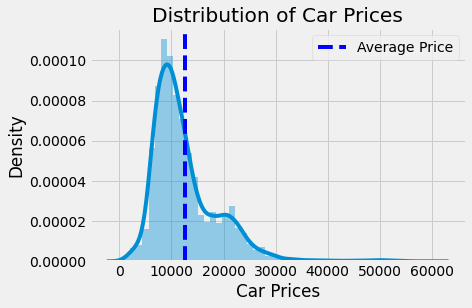

In [70]:
fig, ax = plt.subplots()
sns.distplot(car_data['price'], ax=ax)
ax.set(xlabel='Car Prices', title='Distribution of Car Prices')
ax.axvline(x=car_data['price'].mean(), label='Average Price', color='blue', linestyle='--')
ax.legend()
fig.savefig('car_prices.png')

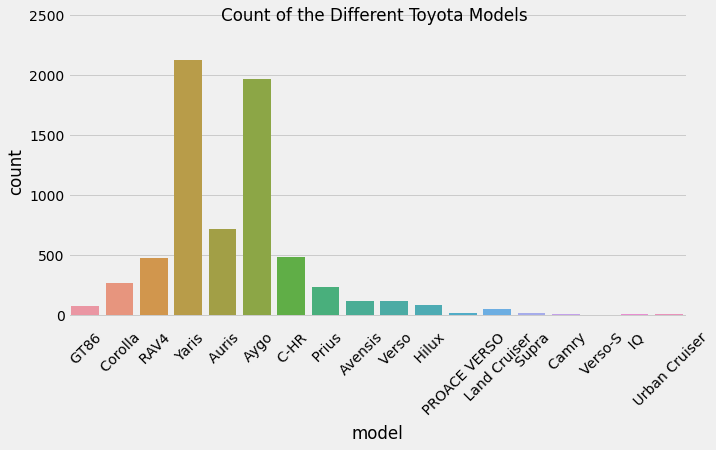

In [74]:
# fig, ax = plt.subplots(figsize=(18, 6))

g =sns.catplot(x='model', data=car_data, kind='count', aspect=12/6)
# g.figure(figsize=(30, 6))
g.fig.suptitle('Count of the Different Toyota Models')
g.set(ylim=(-100, 2500))
plt.xticks(rotation=45)
plt.savefig('toyota_models.png')

                       model  year  price  mileage   tax   mpg  engineSize
fuelType transmission                                                     
Diesel   Automatic        97    97     97       97    97    97          97
         Manual          378   378    378      378   378   378         378
         Semi-Auto        28    28     28       28    28    28          28
Hybrid   Automatic      2038  2038   2038     2038  2038  2038        2038
         Manual            4     4      4        4     4     4           4
         Other             1     1      1        1     1     1           1
Other    Automatic       100   100    100      100   100   100         100
         Manual            5     5      5        5     5     5           5
Petrol   Automatic       422   422    422      422   422   422         422
         Manual         3439  3439   3439     3439  3439  3439        3439
         Semi-Auto       226   226    226      226   226   226         226


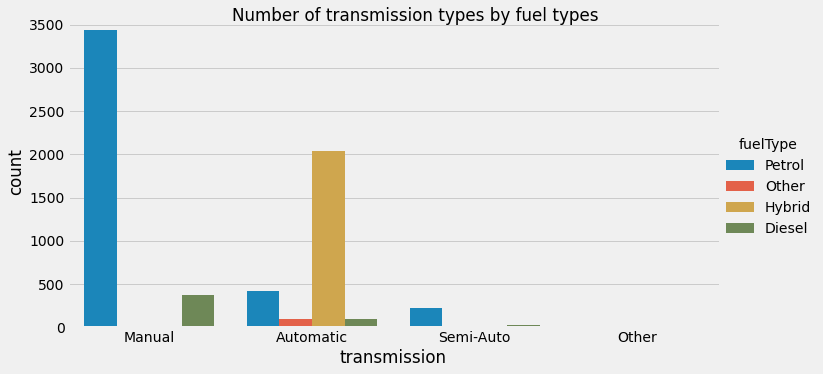

In [75]:
print(car_data.groupby(['fuelType', 'transmission']).count())
g = sns.catplot(x='transmission', hue='fuelType', data=car_data, kind='count', aspect=12/6)
g.fig.suptitle('Number of transmission types by fuel types')
plt.savefig('t_f.png')

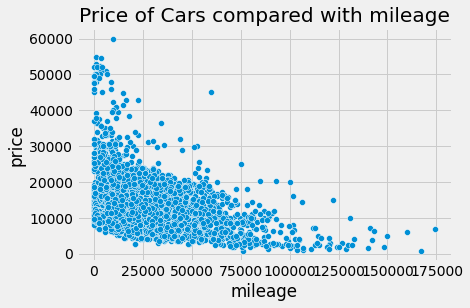

In [73]:
fig, ax = plt.subplots()
sns.scatterplot(x='mileage', y='price', data=car_data,)
plt.title('Price of Cars compared with mileage')
fig.savefig('car_mileage.png')

In [76]:
car_data.fuelType.value_counts().to_frame().to_csv('fueltype.csv')

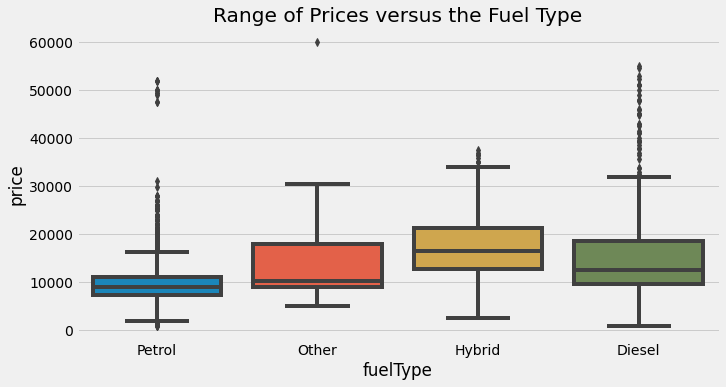

In [77]:
sns.catplot(x='fuelType', y='price', data=car_data, kind='box', aspect=12/6)
plt.title('Range of Prices versus the Fuel Type')
plt.savefig('price_fuel.png')

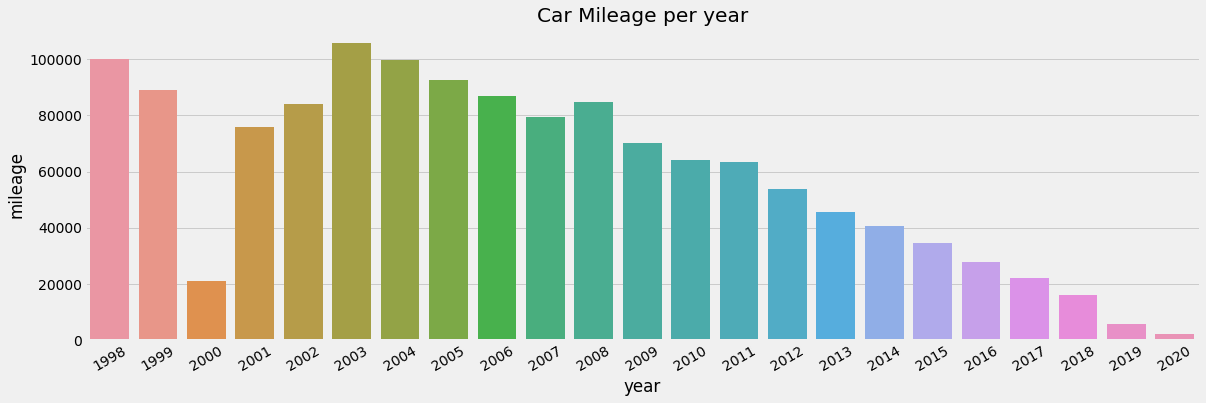

In [78]:
sns.catplot(x='year', y='mileage', data=car_data, kind='bar', aspect=20/6, ci=None)
plt.title('Car Mileage per year')
plt.xticks(rotation=30)
plt.savefig('mileage_per_year.png')

### Supervised Machine Learning Regression Task
**This project takes the form of a Supervised ML Regression task as we are predicting the prices (continuous variable) of cars**


In [10]:
car_data.head(3)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0


#### Preprocessing



In [29]:
df = car_data.copy()

df['year'] = df.year.astype('category')
df['engineSize'] = df.engineSize.astype('category')
df['tax'] = df.tax.astype('category')
df['model'] = df.model.str.lstrip()

y = df['price']
X = df.drop('price', axis=1)


In [30]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   model         6738 non-null   object  
 1   year          6738 non-null   category
 2   transmission  6738 non-null   object  
 3   mileage       6738 non-null   int64   
 4   fuelType      6738 non-null   object  
 5   tax           6738 non-null   category
 6   mpg           6738 non-null   float64 
 7   engineSize    6738 non-null   category
dtypes: category(3), float64(1), int64(1), object(3)
memory usage: 285.7+ KB


In [31]:
labels = ['low', 'small', 'medium', 'large', 'largest']
X['grouped_mpg'] = pd.cut(X.mpg, bins=5, labels=labels)

In [32]:
print(X.head(3))
X = X.drop('mpg', axis=1)

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,grouped_mpg
0,GT86,2016,Manual,24089,Petrol,265,36.2,2.0,low
1,GT86,2017,Manual,18615,Petrol,145,36.2,2.0,low
2,GT86,2015,Manual,27469,Petrol,265,36.2,2.0,low


In [33]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

one_hot = make_column_transformer((OneHotEncoder(handle_unknown='ignore'), 
                                   make_column_selector(dtype_include=['object', 'category' ])),
                                  remainder='passthrough')

### Metric for Evaluation

- Mean Absolute Error

In [48]:
# Cross_validation
rf = Pipeline(steps=[('one_hot', one_hot), ('rf_reg', RandomForestRegressor(n_estimators=300, random_state=42))])

params = {'rf_reg__max_depth': [3, 5, 10, 15, 20, 25],}

grid_rf = GridSearchCV(rf, param_grid=params, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_rf.fit(X_train, y_train)
grid_rf.best_params_

{'rf_reg__max_depth': 15}

In [49]:
cv_results = pd.DataFrame(grid_rf.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_rf_reg__max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.116229,0.158257,0.080095,0.016618,3,{'rf_reg__max_depth': 3},-2338.052710,-2663.336910,-2620.631111,-2587.955235,-2521.115877,-2546.218368,113.981623,6
1,3.711848,0.244985,0.075145,0.008030,5,{'rf_reg__max_depth': 5},-1602.218608,-1694.061999,-1743.141259,-1675.384149,-1641.633580,-1671.287919,47.640927,5
2,10.395558,0.372643,0.097538,0.018422,10,{'rf_reg__max_depth': 10},-1018.684478,-1006.612260,-1030.767776,-993.329529,-1044.782150,-1018.835239,17.975499,4
3,19.615652,0.748255,0.128581,0.023624,15,{'rf_reg__max_depth': 15},-943.288643,-939.390425,-957.962699,-919.071185,-949.258565,-941.794303,12.972926,1
4,25.165753,0.992517,0.163396,0.048148,20,{'rf_reg__max_depth': 20},-964.729824,-957.988256,-985.300477,-935.114171,-960.776913,-960.781928,16.021133,2
5,27.048243,2.519123,0.175903,0.060618,25,{'rf_reg__max_depth': 25},-973.833543,-963.474751,-994.750846,-946.461933,-969.455659,-969.595347,15.642234,3


In [50]:
best_model = grid_rf.best_estimator_
y_pred = best_model.predict(X_test)

MAE = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error of: {MAE}')

Mean Absolute Error of: 920.1538033122387


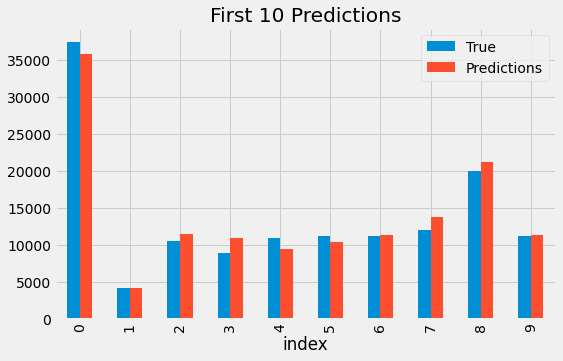

In [80]:
first_10 = pd.DataFrame({'True': y_test[:10].values, 'Predictions': y_pred[:10]}).reset_index()
first_10.to_csv('first10.csv')
fig, ax = plt.subplots()
first_10.plot(x='index', y=['True', 'Predictions'], kind='bar', title='First 10 Predictions', figsize=(8, 5), ax=ax)
fig.savefig('first10.png')

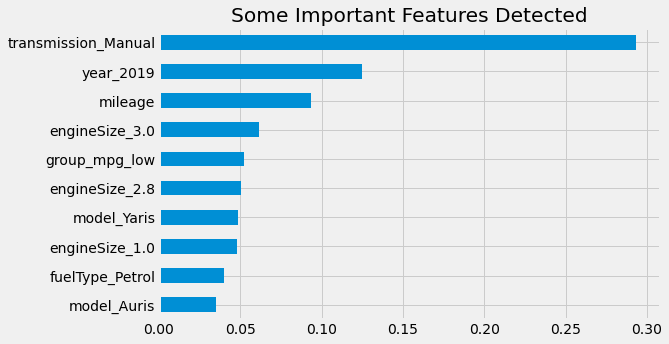

In [83]:
oh_cols = best_model.named_steps['one_hot'].get_feature_names()

oh_cols = [i.replace('onehotencoder__x0', 'model') for i in oh_cols]
oh_cols = [i.replace('onehotencoder__x1', 'year') for i in oh_cols]
oh_cols = [i.replace('onehotencoder__x2', 'transmission') for i in oh_cols]
oh_cols = [i.replace('onehotencoder__x3', 'fuelType') for i in oh_cols]
oh_cols = [i.replace('onehotencoder__x4', 'tax') for i in oh_cols]
oh_cols = [i.replace('onehotencoder__x5', 'engineSize') for i in oh_cols]
oh_cols = [i.replace('onehotencoder__x6', 'group_mpg') for i in oh_cols]

importances = pd.Series(best_model[1][1].feature_importances_, oh_cols).sort_values(ascending=False)
importances =importances[importances > 0]

importances.head(10).sort_values().plot(kind='barh', title='Some Important Features Detected', figsize=(8,5))
plt.savefig('feat_import.png')

### Conclusion and Recommendations

The Project aimed to develop a model that can predict car prices with maximum loss of £1500.
Using the Dataset the results from our RandomForest model indicates strong predictive power with a Mean Absolute Error of £920.15. The results from our model can successfully help predict the worth/price of a used Toyota car brought to the dealership given its attributes including model, year, mileage, etc.

Obtaining more data will also enable our model achieve higher predictive power.

In [84]:
y.mean()

12522.3910655981